In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=u'/usr/share/fonts/truetype/fonts-japanese-gothic.ttf', size=14)

In [3]:
data_columns = pd.read_excel('/home/kyohei/NEDO_anke_data/NEDO_H24.xlsx').columns
data = pd.read_excel('/home/kyohei/NEDO_anke_data/NEDO_H24.xlsx',skiprows=6,skip_footer=12)

In [4]:
data.columns = data_columns

In [5]:
Q29 = data.columns[data.columns.str.contains('Q29_')]

In [6]:
data_sub = data.ix[:,Q29]

In [7]:
data_sub.dropna(inplace=True)

In [8]:
translation = {1.0:1.0,2.0:0.8,3.0:0.6,4.0:0.4,5.0:0.2}

In [9]:
translation

{1.0: 1.0, 2.0: 0.8, 3.0: 0.6, 4.0: 0.4, 5.0: 0.2}

In [10]:
data_sub_trans = data_sub.apply(lambda x:x.map(translation))

In [11]:
from scipy.spatial.distance import pdist
a = pdist(data_sub_trans.T,metric='euclidean')

In [12]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(data_sub_trans.T,data_sub_trans.T)

array([[  0.00000000e+00,   3.62767143e+00,   3.44673759e+00,
          3.91918359e+00,   2.57681975e+00,   3.03973683e+00,
          3.20000000e+00,   3.23109888e+00,   2.62297541e+00,
          4.72863617e+00,   2.89136646e+00,   5.58569602e+00],
       [  3.62767143e+00,   0.00000000e+00,   3.93954312e+00,
          3.94461658e+00,   3.50428309e+00,   4.35430821e+00,
          3.57211422e+00,   3.91918359e+00,   3.90384426e+00,
          3.52136337e+00,   3.33466640e+00,   4.23792402e+00],
       [  3.44673759e+00,   3.93954312e+00,   0.00000000e+00,
          2.73495887e+00,   3.10483494e+00,   2.91204396e+00,
          3.21869539e+00,   3.58887169e+00,   3.06594194e+00,
          4.65617869e+00,   3.23728281e+00,   5.34041197e+00],
       [  3.91918359e+00,   3.94461658e+00,   2.73495887e+00,
          0.00000000e+00,   3.62215406e+00,   3.19374388e+00,
          3.56651090e+00,   4.06448029e+00,   3.60000000e+00,
          3.99499687e+00,   3.53836120e+00,   4.66476152e+00],
    

In [13]:
data_sub_trans.columns

Index([u'Q29_技術', u'Q29_ｺｽﾄ', u'Q29_先端技術', u'Q29_ｼﾅｼﾞｰ', u'Q29_ｽﾋﾟｰﾄﾞｱｯﾌﾟ',
       u'Q29_ﾈｯﾄﾜｰｸ', u'Q29_ﾘｽｸ', u'Q29_資金', u'Q29_人材', u'Q29_標準化',
       u'Q29_ﾌﾟﾚｾﾞﾝｽ', u'Q29_資源'],
      dtype='object')

In [14]:
from scipy.cluster.hierarchy import ward,dendrogram

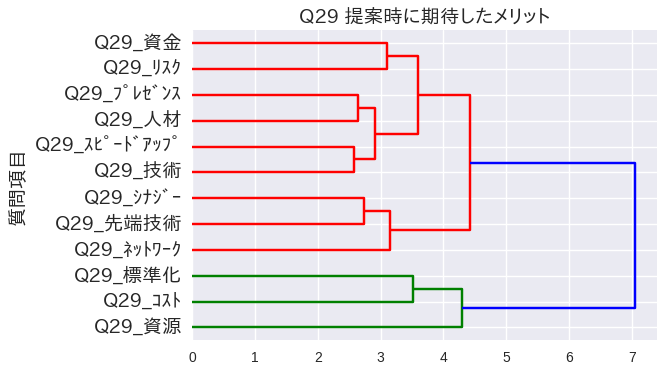

In [15]:
leaves = dendrogram(ward(data_sub_trans.values.T),orientation='right')['leaves']
plt.ylabel(u'質問項目',fontproperties=fp)
plt.yticks([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115],data_sub.columns[leaves],fontproperties=fp)
plt.title(u'Q29 提案時に期待したメリット',fontproperties=fp)
plt.show()

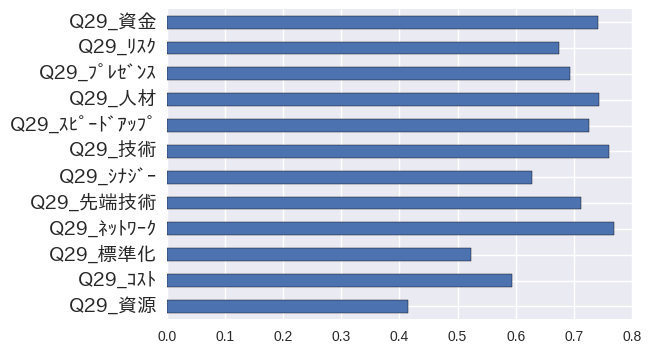

In [16]:
data_sub_trans.describe().ix['mean',data_sub.columns[leaves]].plot(kind='barh')
a = plt.yticks(fontproperties=fp)

In [17]:
Q_30 = data.ix[:,data.columns.str.contains('Q30')]

In [18]:
Q_30_sub = Q_30.ix[:,[0,10,19,30,38,48,59,61,63,65,67]]

In [19]:
Q_30_sub.dropna(inplace=True)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
trans_data = {1.:150.,2.:120.,3.:100,4.:70,5.:40}
Q_30_sub = Q_30_sub.apply(lambda x:x.map(trans_data))

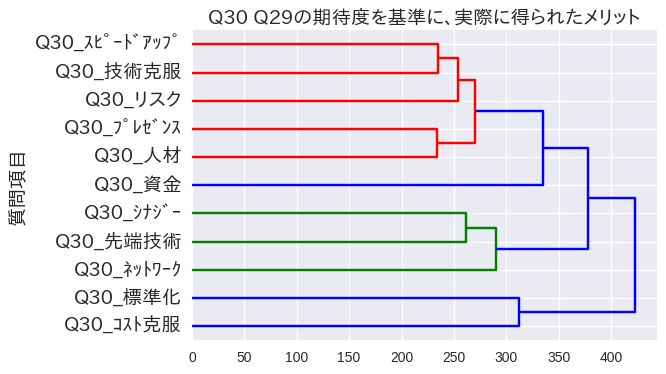

In [21]:
leaves = dendrogram(ward(Q_30_sub.T),orientation='right')['leaves']
plt.ylabel(u'質問項目',fontproperties=fp)
plt.yticks([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105],Q_30_sub.columns[leaves],fontproperties=fp)
plt.title(u'Q30 Q29の期待度を基準に、実際に得られたメリット',fontproperties=fp)

In [148]:
y = data.ix[:,data.columns.str.contains(u'Q13_継続・非継続')]

In [149]:
y.ix[:,0] = np.where(y==1,1,0)

In [150]:
X = data.ix[:,data.columns.str.contains(u'Q21_時期')]

In [151]:
y_X = pd.concat([y,X],axis=1)

In [152]:
y_X.dropna(inplace=True)

In [153]:
y_X.columns = ['y','X']

In [154]:
import statsmodels.api as sm
y_X.x_c = sm.add_constant(y_X.X)

In [155]:
model = sm.GLM(y_X.y,y_X.x_c,family=sm.families.Binomial())

In [156]:
result = model.fit()

In [197]:
print result.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  170
Model:                            GLM   Df Residuals:                      168
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -53.423
Date:                Mon, 24 Jul 2017   Deviance:                       106.85
Time:                        11:58:12   Pearson chi2:                     187.
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.9852      0.680      7.326      0.000         3.652     6.319
X             -1.4871      0.239     -6.222      0.0

In [157]:
print result.summary2()

               Results: Generalized linear model
Model:              GLM              AIC:            110.8456 
Link Function:      logit            BIC:            -755.9685
Dependent Variable: y                Log-Likelihood: -53.423  
Date:               2017-07-24 10:45 LL-Null:        -80.740  
No. Observations:   170              Deviance:       106.85   
Df Model:           1                Pearson chi2:   187.     
Df Residuals:       168              Scale:          1.0000   
Method:             IRLS                                      
---------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
---------------------------------------------------------------
const       4.9852    0.6804   7.3264  0.0000   3.6515   6.3188
X          -1.4871    0.2390  -6.2215  0.0000  -1.9555  -1.0186



In [200]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
y = y_X.iloc[:,0].values.reshape([y_X.shape[0],1])
X = y_X.iloc[:,1].values.reshape([y_X.shape[0],1])
model.fit(X,y)

/home/kyohei/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [193]:
model.score(X,y)

0.88823529411764701

In [195]:
model.intercept_

array([ 3.61085971])

In [196]:
model.coef_

array([[-1.02142859]])